<a href="https://colab.research.google.com/github/ShamsAl/MNIST/blob/main/CSE_4238_170104005_Assignmnet2_Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DataSet

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=264d794148571f835f66b353148b05e3a1ab297d022908c8208925cbc5f8f42b
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
!gdown --id 10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW

Downloading...
From: https://drive.google.com/uc?id=10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW
To: /content/Dataset C.zip
162MB [00:01, 90.0MB/s]


In [ ]:
!unzip '/content/Dataset C.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

Read CSV

In [ ]:
traning_csv = '/content/training-c.csv'
read_df = pd.read_csv(traning_csv)

In [ ]:
read_df.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

Dataset Proceed

In [ ]:
number_of_digit_class = read_df['digit'].nunique()

DATASET_ROOT_DIR = './PROCESSED_DATASET_170104005/' 
path = Path(DATASET_ROOT_DIR)
path.mkdir(parents=True, exist_ok=True)
DATASET_ROOT_DIR = os.path.abspath(path)

for i in range(0,number_of_digit_class):
  select_digit = read_df[read_df['digit'] == i]
  for index,val in select_digit.iterrows():
    file_relative_path_from= f"./{val['database name']}/{val['filename']}"
    file_relative_dir_to = f"{DATASET_ROOT_DIR}/{val['digit']}"
    Path(file_relative_dir_to).mkdir(parents=True, exist_ok=True)
    shutil.copy(file_relative_path_from, file_relative_dir_to)
    print(file_relative_path_from , file_relative_dir_to , "OK")

Streaming output truncated to the last 5000 lines.
./training-c/c22339.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22368.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22403.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22404.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22415.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22423.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22435.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22456.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22462.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22477.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22488.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22497.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22513.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22517.png /content/PROCESSED_DATASET_170104005/7 OK
./training-c/c22524.png /

Creating zip file

In [ ]:
ZIP_FILE_NAME = 'PROCESSED_DATASET_170104005.zip'
!zip -r $ZIP_FILE_NAME 'PROCESSED_DATASET_170104005/'

Streaming output truncated to the last 5000 lines.
  adding: PROCESSED_DATASET_170104005/9/c23995.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c14988.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c09385.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c12070.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c14062.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c08423.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c09024.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c12184.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c22915.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c08719.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c17726.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c21612.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c07516.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c19329.png (stored 0%)
  adding: PROCESSED_DATASET_170104005/9/c20088.png (stored 0%)
  ad

Copy zip file into Drive

In [ ]:
!cp '/content/PROCESSED_DATASET_170104005.zip'  '/content/drive/MyDrive/Softlab/dataset'

Load Proe-processed Data

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


In [ ]:
!gdown --id '1rc_9KMxQpI4RYqrERnN2NbEmj8bJLGu1'

Downloading...
From: https://drive.google.com/uc?id=1rc_9KMxQpI4RYqrERnN2NbEmj8bJLGu1
To: /content/PROCESSED_DATASET_170104005.zip
163MB [00:01, 150MB/s]


Unzip 

In [ ]:
!unzip '/content/PROCESSED_DATASET_170104005.zip'

Archive:  /content/PROCESSED_DATASET_170104005.zip
replace PROCESSED_DATASET_170104005/5/c05009.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Remove Zip

In [ ]:
!rm '/content/PROCESSED_DATASET_170104005.zip'

^C


Import Packages

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary

!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=ed649ba051f888f20ede6a8e574d5de0b2c3f554e67be4312ae61a4869ca2262
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


Tunning Variable

In [ ]:
base_dir ='/content/PROCESSED_DATASET_170104005' 
BATCH_SIZE = 32


IMAGE_SIZE = 28
LEARNING_RATE = 0.01
TEST_SIZE = 0.2
OUTPUT_DIM=10

#Load Dataset

In [ ]:
# transform = transforms.Compose([
#                                 # transforms.ToPILImage(),

#                                 ## this is only for when model is 1
#                                 transforms.Grayscale(), 
                                
#                                 # transforms.RandomRotation(20,expand=True), ## adding random rotation 20deg
#                                 # torchvision.transforms.ColorJitter(hue=.05, saturation=.05), ## adding color filter
#                                 # transforms.RandomVerticalFlip(), ## adding vertical flip
#                                 # transforms.RandomHorizontalFlip(), ## adding horizontal flip
#                                 transforms.Resize(IMAGE_SIZE),  ## image resize
#                                 transforms.CenterCrop(IMAGE_SIZE), ## image center crop
#                                 transforms.ToTensor(), ## array converted into torch tensor and then divided by 255 (1.0/255)
#                                 # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                                ])

# #load training dataset 
# dataset = torchvision.datasets.ImageFolder(base_dir, transform=transform)
# n = len(dataset) 
# n_test = int(TEST_SIZE * n) # 10% validation
# trainDataset, validDataSet = torch.utils.data.random_split(dataset,[n - n_test,n_test]) #random split dataset
# trainloader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
# validationloader = torch.utils.data.DataLoader(validDataSet, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True,) 
# print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
# print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

Length of the trainloader: 19456
Length of the validationloader: 4864


In [ ]:

trainDataset = torchvision.datasets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  # Normalize the image to [0-1] from [0-255]
                            download=True)

validDataSet = torchvision.datasets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
MAKING DATASET ITERABLE
'''

trainloader = torch.utils.data.DataLoader(dataset=trainDataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

validationloader = torch.utils.data.DataLoader(dataset=validDataSet, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=False)  

print("Length of the trainloader:", len(trainloader ) * BATCH_SIZE)
print("Length of the validationloader:", len(validationloader ) * BATCH_SIZE)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Length of the trainloader: 60000
Length of the validationloader: 10016


#Model Creation

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Model 1

In [ ]:
'''
Model creation 
'''

class LIN_MODEL(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 60)
        self.fc_2 = torch.nn.Linear(60, 50)
        self.fc_3 = torch.nn.Linear(50, 40)
        self.fc_4 = torch.nn.Linear(40, 30)
        self.fc_5 = torch.nn.Linear(30, 20)
        self.fc_6 = torch.nn.Linear(20, outDim)

        self.linear = torch.nn.Linear(784, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.softmax(self.fc_2(x),dim=1)
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.softmax(self.fc_4(x),dim=1)
        x = torch.nn.functional.relu(self.fc_5(x))
        x = self.fc_6(x)
        # x = torch.nn.functional.softmax(self.linear(x),dim=1)
        return x
        
# select CPU or GPU as a device
model_1 = LIN_MODEL(OUTPUT_DIM).to(device)

summary( model_1, input_size=(1, 28, 28))

print(model_1)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 60]          47,100
            Linear-2                   [-1, 50]           3,050
            Linear-3                   [-1, 40]           2,040
            Linear-4                   [-1, 30]           1,230
            Linear-5                   [-1, 20]             620
            Linear-6                   [-1, 10]             210
Total params: 54,250
Trainable params: 54,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.21
Estimated Total Size (MB): 0.21
----------------------------------------------------------------
LIN_MODEL(
  (fc_1): Linear(in_features=784, out_features=60, bias=True)
  (fc_2): Linear(in_features=60, out_features=50, bias=True)
  (fc_3): Linear(in_features=50, out_f

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),lr=LEARNING_RATE, )

# Save Model

In [ ]:
def save_model(
               MODEL_USED,
               SAVEPATH,
               epoch, 
               batch_size, 
               model,
               optimizer,
               image_size,
               tranning_loss=[],
               tranning_acc=[],
               validation_loss=[],
               validation_acc=[],
               learning_rate=0.001,
               meta_data=None):
  SAVEPATH += f"{MODEL_USED}-checkpoint-epoch-{epoch}.pt"
  save_obj = {
       'MODEL_USED':MODEL_USED,
       'batch_size':batch_size,
       'epoch': epoch,
       'model_full': model,
       'optimizer_full': optimizer,
       'model_state': model.state_dict(),
       'optimizer_state': optimizer.state_dict(),
       'image_size': image_size,
       'tranning_loss': tranning_loss,
       'tranning_acc': tranning_acc,
       'validation_loss': validation_loss,
       'validation_acc': validation_acc,
       'learning_rate':learning_rate,
       'meta_data':meta_data
       }

  torch.save(save_obj, SAVEPATH)

# Train Function

In [ ]:
def train_model(start, end, model_used ,model_save_path, model, criterion, optimizer, dataloaders,testloaders):
    since = time.time()
    num_epochs = end
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    phase = 'train'
    steps = 0
    all_tranning_loss=[]
    all_validation_loss=[]
    all_tranning_accuracy=[]
    all_validation_accuracy=[]

    for epoch in range(start,num_epochs):
          model.train()
          phase = 'tranning'
          print('Epoch {}/{}'.format(epoch, num_epochs - 1))
          print('-' * 10)
          running_loss = 0.0
          running_corrects = 0

          for i,(inputs, labels) in enumerate(dataloaders):
                
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

                # running_loss += loss.item() * inputs.size(0)
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels.data)
                

                print_val = f"Epoch: {epoch}/{num_epochs-1} Steps {steps} \t"
                print_val += f"running_loss : {(loss.item()):.6f}\t"
                print_val += f"running_corrects : {torch.sum(preds == labels.data)}\t"  
                print_val += f"total_corrects : {running_corrects}\t"  
                sys.stdout.write('\r' + str(print_val))
                steps += 1
          
          
          steps = 0
          epoch_loss = running_loss / len(dataloaders)
          epoch_acc = running_corrects.double().item() /len(dataloaders.dataset)
          all_tranning_loss.append(loss.item())
          all_tranning_accuracy.append(epoch_acc)
          
          
          print("\n")
          print("----------------------------Tranning Summary----------------------")
          print('{} Tranning Avg. Loss: {:.4f} Tranning Avg. Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
          print("-"*70)
          print("\n")

          print("Start Validation")
          model.eval()
          with torch.no_grad():
              phase = "validation"
              running_loss = 0.0
              running_corrects = 0
              for i,(inputs, labels) in enumerate(testloaders):
                  inputs, labels = inputs.to(device), labels.to(device)
                  outputs = model(inputs)
                  _, preds = torch.max(outputs, 1)
                  loss = criterion(outputs, labels)
                    
                  running_loss += loss.item()
                  running_corrects += torch.sum(preds == labels.data)  

                  print_val = f"Steps {i} \t"
                  print_val += f"validation_running_loss : {(loss.item()):.6f}\t"
                  print_val += f"validation_running_corrects : {torch.sum(preds == labels.data)}\t"  
                  print_val += f"validation_total_corrects : {running_corrects}\t"  
                  sys.stdout.write('\r' + str(print_val))

              epoch_val_loss = running_loss / len(testloaders)
              epoch_val_acc = running_corrects.double().item() /len(testloaders.dataset)
              all_validation_loss.append(epoch_val_loss)
              all_validation_accuracy.append(epoch_val_acc)

              print()
              print("----------------------------Validation Summary-----------------")
              print('{} Validation Avg. Loss: {:.4f} Validation Avg. Acc: {:.4f}'.format(
                    phase, epoch_val_loss, epoch_val_acc))
              print("------------------------------------------------------------")


          model.train()
          
          save_model(model_used,
                     model_save_path,
                     epoch, 
                     len(dataloaders),
                     model,
                     optimizer,
                     IMAGE_SIZE,
                     tranning_loss=all_tranning_loss,
                     tranning_acc= all_tranning_accuracy,
                     validation_loss=all_validation_loss,
                     validation_acc=all_validation_accuracy,
                     learning_rate=0.001)
          # break
      
    print("Complete Train")
          ## deep copy the model
          # if phase == 'val' and epoch_acc > best_acc:
          #       best_acc = epoch_acc
          #       best_model_wts = copy.deepcopy(model.state_dict())

    print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    return 

Start Training

In [ ]:
!mkdir '/content/drive/MyDrive/Softlab/Model_1/Fashion-MNIST'
%cd '/content'

/content


In [ ]:
START=0
END=33
model_save_path = '/content/drive/MyDrive/Softlab/Model_1/Fashion-MNIST/' # must give `/` for the folder directory
model_used= 'EXPERIMENT_MODEL_1_1'
model_ft = model_1


optimizer_ft = optimizer
trainloader= trainloader
testloader = validationloader

In [ ]:
train_model(START, END,model_used, model_save_path, model_ft, criterion, optimizer_ft, trainloader, testloader)

Epoch 0/32
----------
Epoch: 0/32 Steps 1874 	running_loss : 2.300669	running_corrects : 6	total_corrects : 5835	

----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 2.3027 Tranning Avg. Acc: 0.0973
----------------------------------------------------------------------


Start Validation
Steps 312 	validation_running_loss : 2.302228	validation_running_corrects : 2	validation_total_corrects : 1000	
----------------------------Validation Summary-----------------
validation Validation Avg. Loss: 2.3026 Validation Avg. Acc: 0.1000
------------------------------------------------------------
Epoch 1/32
----------
Epoch: 1/32 Steps 1874 	running_loss : 2.302414	running_corrects : 7	total_corrects : 5893	

----------------------------Tranning Summary----------------------
tranning Tranning Avg. Loss: 2.3027 Tranning Avg. Acc: 0.0982
----------------------------------------------------------------------


Start Validation
Steps 312 	validation_runni

#Performence Matrix

Model Load

In [ ]:
class LIN_MODEL(torch.nn.Module): 
    def __init__(self,outDim):
        super(LIN_MODEL, self).__init__()

        self.fc_1 = torch.nn.Linear(784, 60)
        self.fc_2 = torch.nn.Linear(60, 50)
        self.fc_3 = torch.nn.Linear(50, 40)
        self.fc_4 = torch.nn.Linear(40, 30)
        self.fc_5 = torch.nn.Linear(30, 20)
        self.fc_6 = torch.nn.Linear(20, outDim)

        self.linear = torch.nn.Linear(784, outDim)
 
    def forward(self, x):

        x = x.view(-1, 28 * 28) 
        x = torch.nn.functional.relu(self.fc_1(x))
        x = torch.nn.functional.softmax(self.fc_2(x),dim=1)
        x = torch.nn.functional.relu(self.fc_3(x))
        x = torch.nn.functional.softmax(self.fc_4(x),dim=1)
        x = torch.nn.functional.relu(self.fc_5(x))
        x = self.fc_6(x)
        # x = torch.nn.functional.softmax(self.linear(x),dim=1)
        return x
        

In [ ]:
MODEL_LOAD_PATH = '/content/drive/MyDrive/Softlab/Model_1/Fashion-MNIST/EXPERIMENT_MODEL_1_1-checkpoint-epoch-32.pt'
model = torch.load(MODEL_LOAD_PATH,map_location='cpu')
model

{'MODEL_USED': 'EXPERIMENT_MODEL_1_1',
 'batch_size': 1875,
 'epoch': 32,
 'image_size': 28,
 'learning_rate': 0.001,
 'meta_data': None,
 'model_full': LIN_MODEL(
   (fc_1): Linear(in_features=784, out_features=60, bias=True)
   (fc_2): Linear(in_features=60, out_features=50, bias=True)
   (fc_3): Linear(in_features=50, out_features=40, bias=True)
   (fc_4): Linear(in_features=40, out_features=30, bias=True)
   (fc_5): Linear(in_features=30, out_features=20, bias=True)
   (fc_6): Linear(in_features=20, out_features=10, bias=True)
   (linear): Linear(in_features=784, out_features=10, bias=True)
 ),
 'model_state': OrderedDict([('fc_1.weight',
               tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
                       [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
                       [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
                       ...,
                       [ 0.0101,  0.0188, -0.0004,  ..., -0.0084, 

## All the loss and accuracy

In [ ]:
_tranning_loss = model['tranning_loss']
_tranning_acc = model['tranning_acc']
_validation_loss = model['validation_loss']
_validation_acc = model['validation_acc']

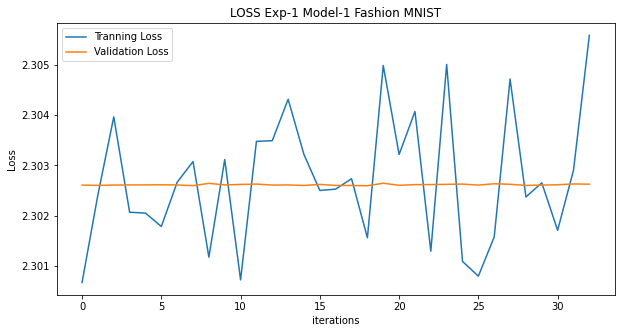

In [ ]:
plt.figure(figsize=(10,5))
plt.title("LOSS Exp-1 Model-1 Fashion MNIST")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

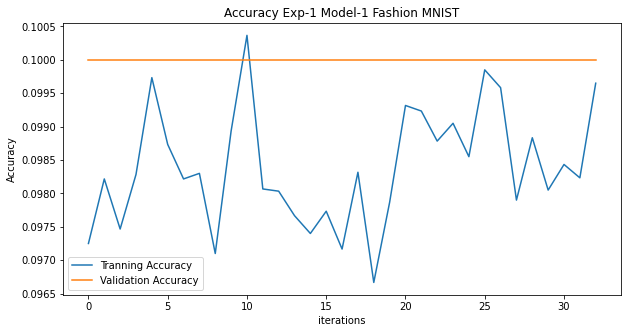

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Exp-1 Model-1 Fashion MNIST")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()